In [1]:
import yfinance as yf
import pandas as pd
import pyfolio as pf 


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_41836/4226566698.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_0050 = yf.download("0050.TW", start="2019-03-04", end="2020-02-28").droplevel(
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Date                                                            
2019-03-04  15.800103  15.923302  15.748771  15.923302  33878280
2019-03-05  15.759032  15.789832  15.697433  15.728233  37601972
2019-03-06  15.800103  15.820637  15.759038  15.779571  78319168
2019-03-07  15.738502  15.820634  15.728234  15.789834  72959080
2019-03-08  15.605038  15.676903  15.563972  15.646103  39900800
...               ...        ...        ...        ...       ...
2020-02-21  19.510250  19.659917  19.446106  19.595775  21604752
2020-02-24  19.264368  19.328512  19.178843  19.296440  54287744
2020-02-25  19.317822  19.349893  19.125391  19.136082  35360416
2020-02-26  19.125391  19.189535  19.007796  19.061249  60324012
2020-02-27  18.954342  19.136081  18.890198  19.104009  98752216

[241 rows x 5 columns]
Date
2019-03-05   -0.002599
2019-03-06    0.002606
2019-03-07   -0.003899
2019-03-08   -0.008480
2019-03-11    0.001974
           


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.06%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2019-03-05
End date,2020-02-27
Total months,11
,Backtest
Annual return,21.06%
Cumulative returns,19.963%
Annual volatility,13.706%
Sharpe ratio,1.46
Calmar ratio,2.52
Stability,0.83
Max drawdown,-8.358%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.36,2019-05-03,2019-05-29,2019-07-22,57
1,7.17,2020-01-14,2020-02-27,NaT,NaN
2,5.25,2019-07-25,2019-08-15,2019-09-12,36
3,2.60,2019-12-18,2020-01-08,2020-01-14,20
4,2.36,2019-11-06,2019-11-11,2019-11-19,10


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


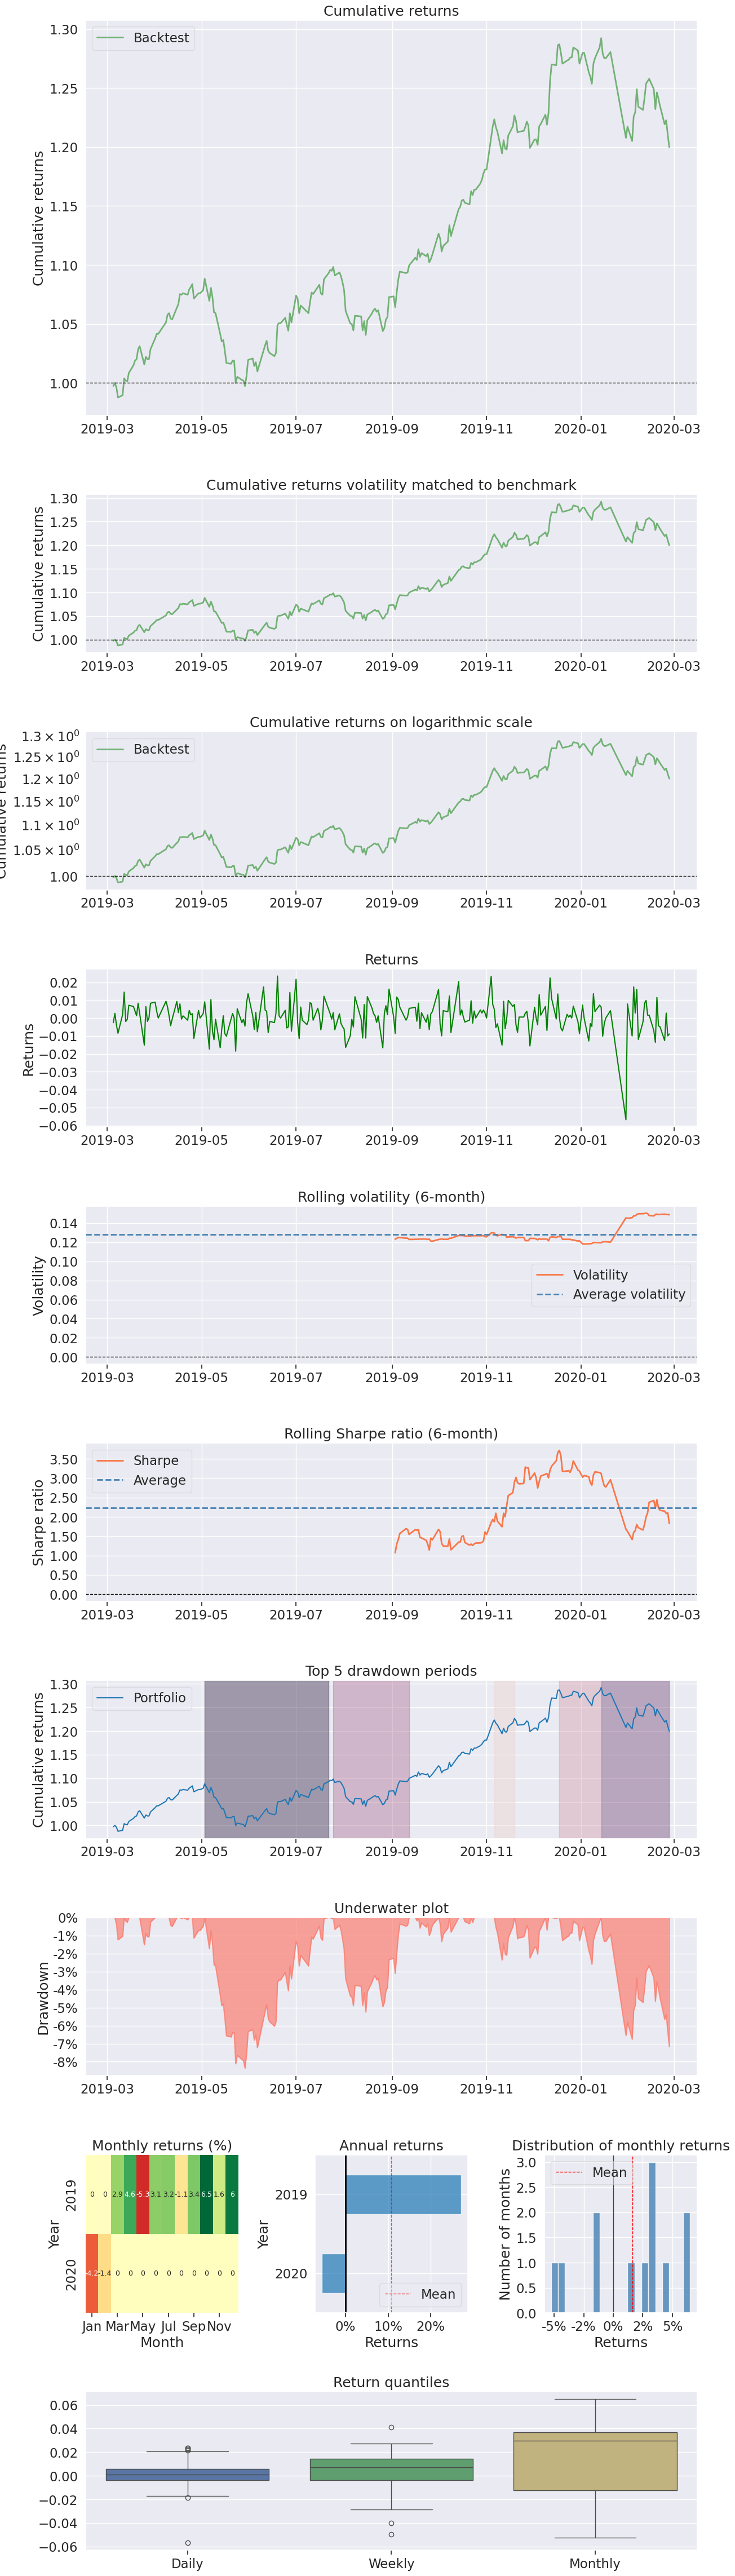

In [3]:
# 使用yfinance 下載0050 的日 K 資料
data_0050 = yf.download("0050.TW", start="2019-03-04", end="2020-02-28").droplevel(
    "Ticker", axis=1
)

print(data_0050)
data_0050 = data_0050[["Open", "High", "Low", "Close", "Volume"]]
data_0050 = data_0050.reset_index()
data_0050["Date"] = pd.to_datetime(data_0050["Date"])

benchmark_returns = data_0050.set_index("Date")["Close"].pct_change().dropna()
benchmark_returns.index = pd.to_datetime(benchmark_returns.index)
print(benchmark_returns)
pf.create_returns_tear_sheet(benchmark_returns)

In [4]:
benchmark_returns

Date
2019-03-05   -0.002599
2019-03-06    0.002606
2019-03-07   -0.003899
2019-03-08   -0.008480
2019-03-11    0.001974
                ...   
2020-02-21   -0.004907
2020-02-24   -0.012603
2020-02-25    0.002775
2020-02-26   -0.009961
2020-02-27   -0.008944
Name: Close, Length: 240, dtype: float64

In [6]:
type(benchmark_returns)

pandas.core.series.Series